In [1]:
import numpy as np
import pandas as pd
import datetime

file = 'center.csv'

#df = pd.DataFrame((pd.read_csv(file,header=0, delimiter=',')),columns=[float, datetime])

raw_data = pd.read_csv(file,header=0, delimiter=',')
data = np.array(raw_data)


#df = pd.DataFrame(data[:,0:3], columns = ['usage', 'supply','temp'], index=data[:,3], dtype=float)
df = pd.DataFrame(data, columns = ['usage', 'supply','temp','date'])
df['supply'] = df['supply'].apply(pd.to_numeric)
df['usage'] = df['usage'].apply(pd.to_numeric)
df['temp'] = df['temp'].apply(pd.to_numeric)
df['date'] = df['date'].apply(pd.to_datetime)
#df.index = pd.to_datetime(df.index)

df.fillna(0)
#print(df.ix[:, "max_supply"].isnull()) 

print(df)
df.info()

     usage  supply  temp       date
0    763.5   869.9  31.1 2016-10-01
1    738.5   828.8  32.9 2016-10-02
2    820.0   950.2  31.3 2016-10-03
3    850.6   972.5  31.4 2016-10-04
4    835.6   966.0  31.7 2016-10-05
5    835.6   988.2  30.2 2016-10-06
6    859.0   960.3  28.2 2016-10-07
7    756.9   889.5  28.5 2016-10-08
8    684.7   856.8  27.5 2016-10-09
9    711.8   879.5  28.4 2016-10-10
10   827.2   966.8  30.0 2016-10-11
11   797.1   938.1  30.1 2016-10-12
12   795.6   931.1  30.8 2016-10-13
13   783.2   947.2  31.0 2016-10-14
14   734.3   892.5  32.1 2016-10-15
15   714.4   931.7  32.5 2016-10-16
16   848.3  1033.3  33.1 2016-10-17
17   842.1  1014.6  31.4 2016-10-18
18   843.4  1033.2  31.6 2016-10-19
19   855.9  1030.2  33.1 2016-10-20
20   854.4  1079.6  32.1 2016-10-21
21   765.6   894.2  32.5 2016-10-22
22   726.9   869.0  32.5 2016-10-23
23   834.8   999.3  32.2 2016-10-24
24   821.2   952.3  31.6 2016-10-25
25   854.7  1057.6  32.1 2016-10-26
26   854.4  1090.4  31.6 201

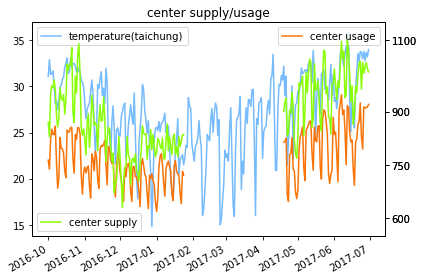

In [8]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax1 = plt.subplots()



#time = pd.to_datetime(df['date'])
ax1.plot(df['date'], df['temp'],label="temperature(taichung)",color='xkcd:sky blue')
#plt.setp(line_supply, linewidth=2, color='r') 

line_usage = ax1.twinx()
line_supply = ax1.twinx()

line_usage.plot(df['date'], df['usage'], label="center usage",color='xkcd:orange')
#plt.setp(line_supply, linewidth=2, color='b') 


line_supply.plot(df['date'], df['supply'],label="center supply",color='xkcd:lime green')

#datemin = datetime.date(datetime.min().year, 1, 1)
#datemax = datetime.date(datetime.max().year + 1, 1, 1)
#ax1.set_xlim(datemin, datemax)

plt.xlabel('date')
plt.title('center supply/usage')
plt.setp(line_supply, yticks=[600, 750, 900, 1100])
plt.setp(line_usage, yticks=[600, 750, 900, 1100])
line_supply.set_ylim(550, 1150)
line_usage.set_ylim(550, 1150)
#line_supply.yticks([800, 900, 1000, 1100, 1200])
#line_usage.yticks([800, 900, 1000, 1100, 1200])

fig.autofmt_xdate()
ax1.legend()
line_usage.legend()
line_supply.legend()
plt.legend(loc="best")
fig.tight_layout()
plt.show()
fig.savefig('center.png', dpi=fig.dpi)